### ***Linear-Regression*** : Predict the percentage of marks of an student based on the number of study hours





In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [9]:
scores_data = pd.read_csv("http://bit.ly/w-data")
scores_data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### **Let’s visualize the relationship between the independent and target variables**

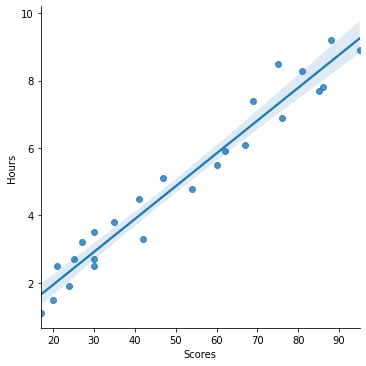

In [10]:
sns.lmplot(x="Scores", y="Hours", data=scores_data)

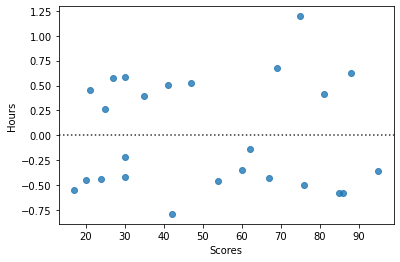

In [11]:
sns.residplot(x = "Scores", 
              y = "Hours", 
              data = scores_data)  
plt.show() 

### **2-D graph between Scores and Hours**

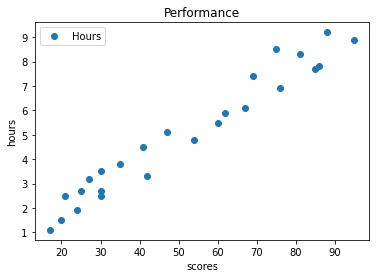

In [36]:
scores_data.plot(x='Scores', y='Hours', style='o')  
plt.title('Performance')  
plt.xlabel('scores')  
plt.ylabel('hours')  
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


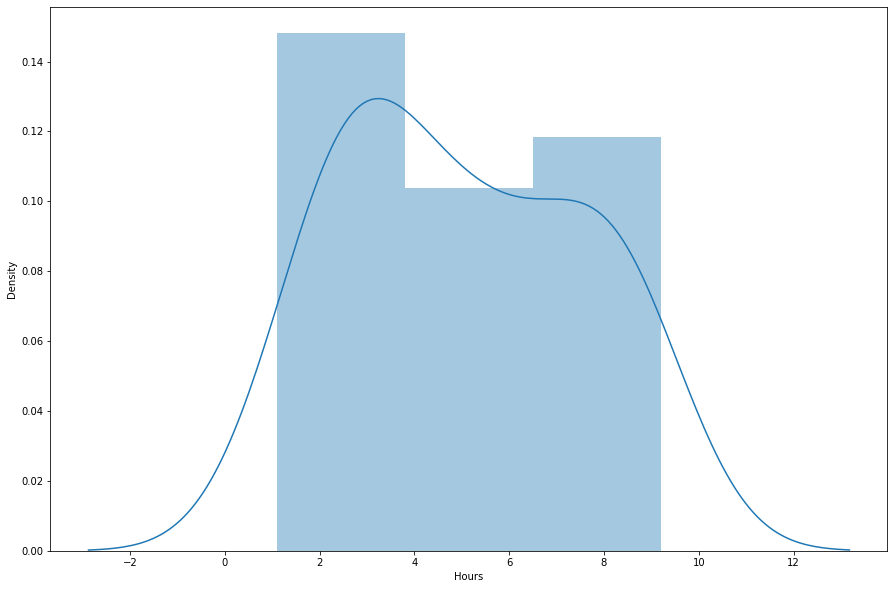

In [37]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(scores_data['Hours'])

### **Splitting independent and dependent variables**

In [16]:
X = scores_data.iloc[:, :-1].values
Y = scores_data.iloc[:, 1].values

### **Train and Test split**

In [17]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

### **Training the Algorithm**

In [27]:
lr = LinearRegression() #build the model
lr.fit(X_train, Y_train) #fit the training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
#To retrieve the intercept:
print(lr.intercept_)

#For retrieving the slope:
print(lr.coef_)

0.6559356787821784
[10.26854432]


### **Plotting Regression Line For Training and Testing Set**

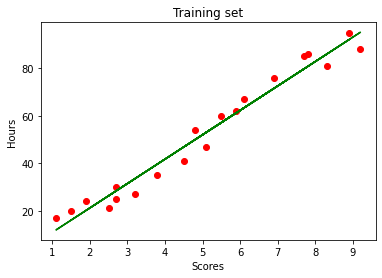

In [19]:
plt.scatter(X_train, Y_train, color = "red")
plt.plot(X_train, lr.predict(X_train), color = "green")
plt.title("Training set")
plt.xlabel("Scores")
plt.ylabel("Hours")
plt.show()

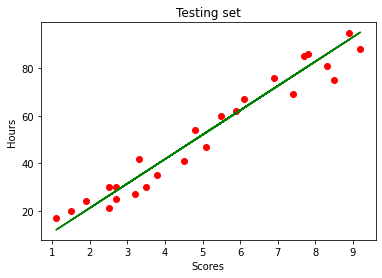

In [39]:
plt.scatter(X, Y, color = "red")
plt.plot(X_train, lr.predict(X_train), color = "green")
plt.title("Testing set")
plt.xlabel("Scores")
plt.ylabel("Hours")
plt.show()

## **Prediction**

In [41]:
y_pred = lr.predict(X_test)

In [42]:
Demo = pd.DataFrame({'Actual Score': Y_test, 'Predicted Score': y_pred})  
Demo

,Actual Score,Predicted Score
0,30,26.327296
1,30,36.595841
2,75,87.938562
3,69,76.643164
4,42,34.542132


### **Bar graph showing the comparison of Actual and Predicted values**

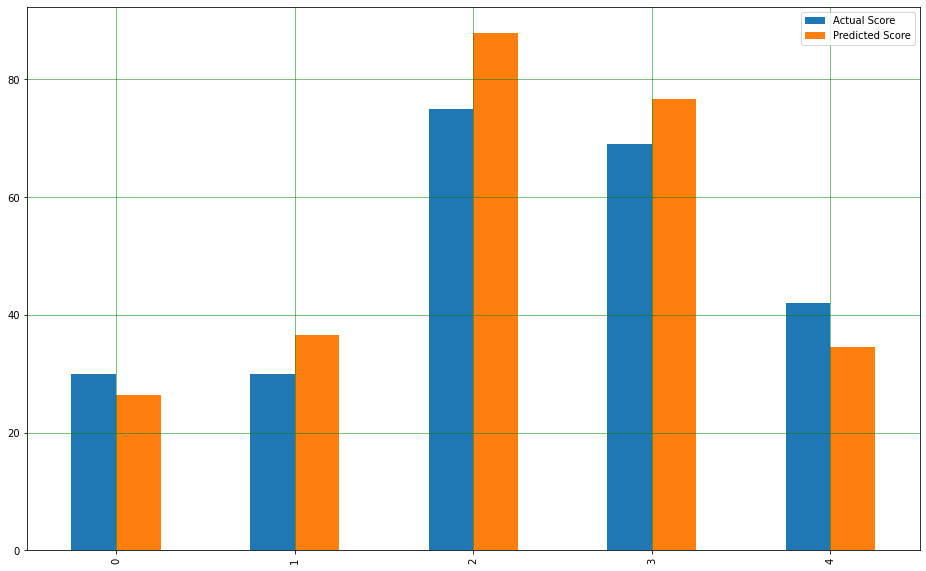

In [44]:
df1 = Demo
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### **Plotting test data**

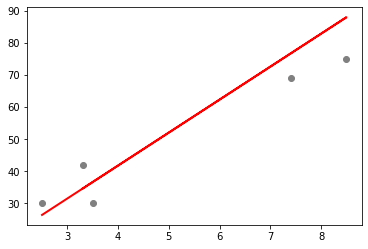

In [45]:
plt.scatter(X_test, Y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

### **Evaluate the performance**

In [ ]:
from sklearn import metrics
#Mean absolute error
print(metrics.mean_absolute_error(Y_test,y_pred))


7.567722878625139


In [ ]:
#Mean Squared Error
print(metrics.mean_squared_error(Y_test,y_pred))


58.49201750828665


In [ ]:
#Root mean squared error 
print(np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

7.648007420778739



### **For Making Own Prediction**


In [ ]:
Hours = 8.9
hours_arr=np.array(Hours).reshape(-1,1)
predict_score=lr.predict(hours_arr)
print("No of hours = {}".format(Hours))
print("Predicted Score={}".format(predict_score[0]))

No of hours = 8.9
Predicted Score=87.30961331901182
